In [1]:
import pandas as pd
import numpy as np

In [2]:
year = 2024
url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
table_list = pd.read_html(url)

df = table_list[0]

In [3]:
df2 = df.copy() # We will see this later


In [4]:

df.head()


,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,01/03/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,01/04/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,01/05/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,01/08/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17


In [5]:
df.columns


Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '52 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2',
       '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1'],axis=1).set_index('Date')

In [7]:
df

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,
2024-01-02,NaN,NaN,5.55,5.54,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
2024-01-03,NaN,NaN,5.54,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2024-01-04,NaN,NaN,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
2024-01-05,NaN,NaN,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
2024-01-08,NaN,NaN,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,NaN,NaN,5.51,5.35,5.28,5.15,4.96,4.43,3.99,3.82,3.72,3.77,3.86,4.21,4.13
2024-08-23,NaN,NaN,5.51,5.35,5.25,5.13,4.92,4.36,3.90,3.73,3.65,3.71,3.81,4.18,4.10
2024-08-26,NaN,NaN,5.49,5.34,5.24,5.13,4.91,4.38,3.91,3.74,3.66,3.72,3.82,4.19,4.11


In [8]:
#FUNCTION FOR CLEANING
#Now that we have the cleaning steps we can easily create a function for this as well as resetting the dataframe index to be the Date column:
def clean_df(df):
   df['Date'] = pd.to_datetime(df['Date'])
   df = df.set_index('Date')
   df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1','2 Mo', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT'],axis=1)
   return df


In [9]:
if 'Date' in df.columns:
    df = clean_df(df)
else:
    print("Error: 'Date' column not found in the dataframe.")


Error: 'Date' column not found in the dataframe.


In [10]:
# Why is there an error? Well remember we clean df in a previous step making the index the Date column. So we need to reset the index to make the Date column a column again.
# Or alternatively, we can clean the copy of our original dataframe df2 which has the Date column as a column and not the index.

In [11]:
df2.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '52 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2',
       '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [12]:
df=clean_df(df2)

In [13]:
import seaborn as sns

<Axes: ylabel='Date'>

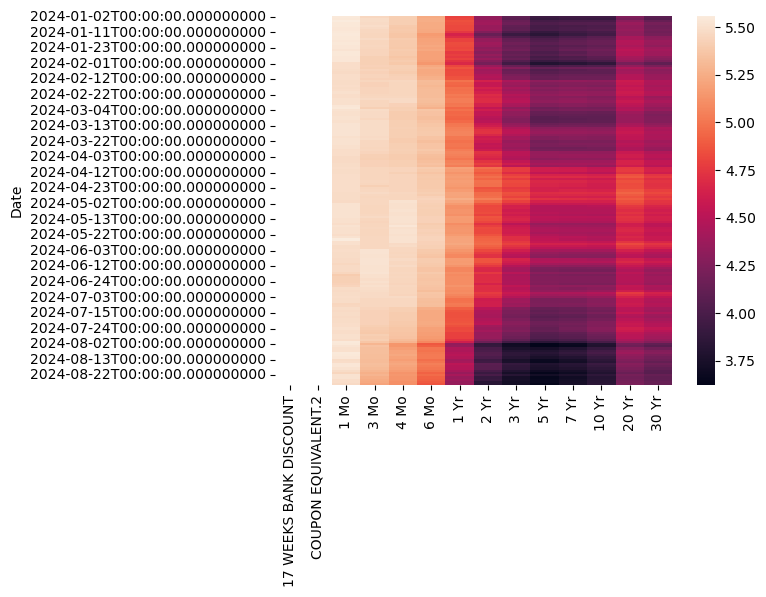

In [14]:
sns.heatmap(df)

In [15]:
# Grabbing Data for Multiple Years. Note here that we will concatenate to the dataframe we cleaned above and will start adding new years to it.
for year in range(2010,2023):
    url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    table_list = pd.read_html(url)
    df = pd.concat([df,clean_df(table_list[0])]) 

In [16]:
df

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,
2024-01-02,NaN,NaN,5.55,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
2024-01-03,NaN,NaN,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2024-01-04,NaN,NaN,5.56,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
2024-01-05,NaN,NaN,5.54,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
2024-01-08,NaN,NaN,5.54,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,NaN,3.80,4.34,4.59,4.67,4.66,4.31,4.09,3.86,3.83,3.75,3.99,3.82
2022-12-27,NaN,NaN,3.87,4.46,4.66,4.76,4.75,4.32,4.17,3.94,3.93,3.84,4.10,3.93
2022-12-28,NaN,NaN,3.86,4.46,4.66,4.75,4.71,4.31,4.18,3.97,3.97,3.88,4.13,3.98


In [17]:
df = df.sort_index()

In [18]:
df

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,0.05,0.08,NaN,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,NaN,NaN,0.03,0.07,NaN,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,NaN,NaN,0.03,0.06,NaN,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,NaN,NaN,0.02,0.05,NaN,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,NaN,NaN,0.02,0.05,NaN,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,NaN,NaN,5.51,5.28,5.15,4.96,4.43,3.99,3.82,3.72,3.77,3.86,4.21,4.13
2024-08-23,NaN,NaN,5.51,5.25,5.13,4.92,4.36,3.90,3.73,3.65,3.71,3.81,4.18,4.10
2024-08-26,NaN,NaN,5.49,5.24,5.13,4.91,4.38,3.91,3.74,3.66,3.72,3.82,4.19,4.11


In [20]:
df.head()

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,0.05,0.08,NaN,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,NaN,NaN,0.03,0.07,NaN,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,NaN,NaN,0.03,0.06,NaN,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,NaN,NaN,0.02,0.05,NaN,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,NaN,NaN,0.02,0.05,NaN,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


In [21]:
import plotly.graph_objects as go

In [22]:
x = df.columns
y = df.index
z = df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Yield Curves',
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}})
fig.show()

In [23]:
# Task 0: Find summary statistics per year for a maturity of your choice. Note that the data now is the index. So I would go like this:
df_sum_stats = df.reset_index(drop=False) # This will make a new dataframe that now has a range index and the Date column is now a column.
# Cut it for the year of your choice and use the commands we have talked about.


In [ ]:
# Task 1: Redo this for the period 2015-2019, eliminate the 4MO column if it exists, and plot the heatmap.
